### Outlier detection, feature selection, standard scaling, and hyperparameter tuning are all important steps in the classification process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

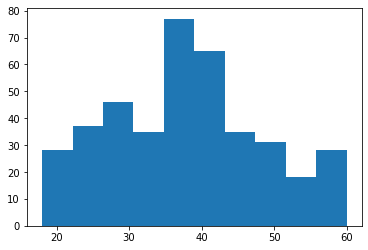

In [3]:
plt.hist(data['Age'])

## Outlier

<AxesSubplot:ylabel='Age'>

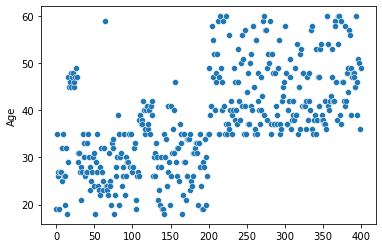

In [4]:
#plt.scatter(data.index,data['Age'])
sns.scatterplot(data.index,data['Age'])

<AxesSubplot:xlabel='Age'>

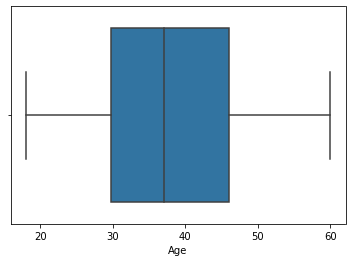

In [5]:
sns.boxplot(data['Age'])

In [6]:
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

# IQR

In [7]:
q1,q3=np.percentile(data['Age'],[25,75])
print(q1,q3)

29.75 46.0


In [8]:
iqr= q3 - q1

In [9]:
lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
print(lb,ub)

5.375 70.375


In [10]:
data.shape

(400, 5)

In [11]:
data = data.loc[data['Age'] > lb][data['Age'] < ub]

# z-score method

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

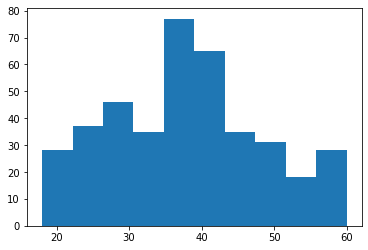

In [12]:
plt.hist(data['Age'])

## z = x - mean / SD

In [13]:
out = []  # Store the outliers
def outliers(data):
    threshold = 3  # Indicates 3 standard deviations (SD)
    mean = np.mean(data)  # Calculating the mean
    std = np.std(data)  # Calculating the standard deviation
    
    for i in data:  # Looping through all data points
        z_score = (i - mean) / std  # Calculate the z-score
        if np.abs(z_score) > threshold:  # Checking if it falls outside 3 SD
            out.append(i)  # Add the outliers to the list
    return out

In [14]:
out =outliers(data['Age'])

In [15]:
out

[]

In [16]:
data.shape

(400, 5)

In [17]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [19]:
x=data.iloc[:,[1,2,3]]
y=data.iloc[:,[4]]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 3)
(320, 1)
(80, 3)
(80, 1)


## feature selection in classification

In [21]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

mi = mutual_info_classif(x_train,y_train)
mi

array([0.04627361, 0.24587423, 0.200597  ])

In [22]:
MI = pd.Series(mi)
MI.index = x_train.columns
MI.sort_values(ascending=False)

Age                0.245874
EstimatedSalary    0.200597
Gender             0.046274
dtype: float64

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

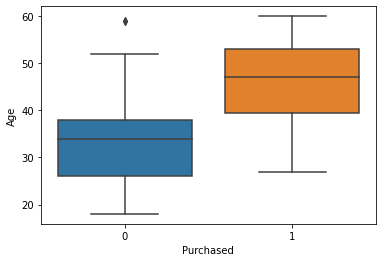

In [23]:
sns.boxplot(data['Purchased'],data['Age'])

<AxesSubplot:ylabel='EstimatedSalary'>

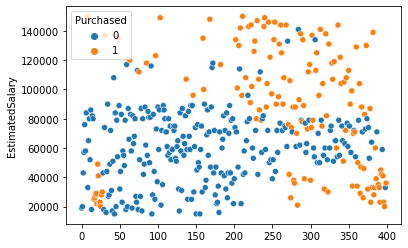

In [24]:
sns.scatterplot(data.index,data['EstimatedSalary'],hue=data['Purchased'])

<AxesSubplot:xlabel='Purchased', ylabel='count'>

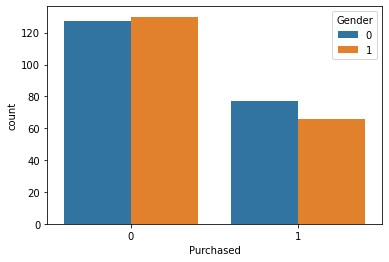

In [25]:
sns.countplot(data['Purchased'],hue=data['Gender'])

## Groupby

In [26]:
data[['Gender','Purchased']].groupby('Gender').mean()

,Purchased
Gender,
0,0.377451
1,0.336735


## Feature scaling

In [27]:
x_train.head()

,Gender,Age,EstimatedSalary
336,1,58,144000
64,0,59,83000
55,0,24,55000
106,0,26,35000
300,0,58,38000


In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss = StandardScaler()
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)
x_train

array([[1.        , 0.95238095, 0.95555556],
       [0.        , 0.97619048, 0.5037037 ],
       [0.        , 0.14285714, 0.2962963 ],
       [0.        , 0.19047619, 0.14814815],
       [0.        , 0.95238095, 0.17037037],
       [0.        , 0.57142857, 0.48148148],
       [0.        , 0.52380952, 0.44444444],
       [1.        , 0.97619048, 0.85185185],
       [0.        , 0.66666667, 0.19259259],
       [0.        , 0.54761905, 0.33333333],
       [1.        , 0.57142857, 0.36296296],
       [0.        , 0.45238095, 0.97037037],
       [0.        , 0.11904762, 0.24444444],
       [1.        , 0.16666667, 0.13333333],
       [1.        , 0.14285714, 0.51111111],
       [0.        , 0.21428571, 0.6       ],
       [1.        , 0.11904762, 0.35555556],
       [1.        , 0.71428571, 0.13333333],
       [1.        , 0.71428571, 0.55555556],
       [1.        , 0.57142857, 0.65925926],
       [0.        , 0.61904762, 0.17777778],
       [1.        , 0.33333333, 0.77777778],
       [0.

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dtc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9125

In [31]:
confusion_matrix(y_pred,y_test)

array([[54,  3],
       [ 4, 19]], dtype=int64)

## Hyper parameter tunning

In [32]:
from sklearn.model_selection import GridSearchCV
grid_param = { 
    'criterion':['gini','entropy'],
    'max_depth' : [ 5,6,7] 
}
grid_search = GridSearchCV(estimator=dtc,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7]})

In [33]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [34]:
dtc_hyper = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc_hyper.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
y_pred_hyper = dtc_hyper.predict(x_test)
accuracy_score(y_test,y_pred_hyper)

0.95

In [36]:
confusion_matrix(y_pred,y_test)

array([[54,  3],
       [ 4, 19]], dtype=int64)

In [37]:
confusion_matrix(y_pred_hyper,y_test)

array([[56,  2],
       [ 2, 20]], dtype=int64)